In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [4]:
df=pd.read_csv('Default_Fin.csv')
df.head(30)

Index  Employed  Bank Balance  Annual Salary  Defaulted?
0       1         1       8754.36      532339.56           0
1       2         0       9806.16      145273.56           0
2       3         1      12882.60      381205.68           0
3       4         1       6351.00      428453.88           0
4       5         1       9427.92      461562.00           0
5       6         0      11035.08       89898.72           0
6       7         1       9906.12      298862.76           0
7       8         0       9704.04      211205.40           0
8       9         1      13932.72      449622.36           0
9      10         1          0.00      351303.24           0
10     11         0          0.00      262452.84           0
11     12         0      14646.96      159222.72           0
12     13         1       2844.60      339020.40           0
13     14         1       7280.88      539934.72           0
14     15         1      13355.64      285722.04           0
15     16         1       3434.76      540508.92           0
16     17         1          0.00      603183.72           0
17     18         0       6330.48      211638.48           0
18     19         1       5831.28      738793.32           0
19     20         1      13140.84      317575.56           0
20     21         1       2747.40      606002.16           0
21     22         1      11451.12      389490.12           0
22     23         1      12671.52      615814.56           0
23     24         1       7703.76      365593.20           0
24     25         1       9278.52      412239.72           0
25     26         1      10260.12      302535.96           0
26     27         1       7716.00      497682.12           0
27     28         1      17458.32      386269.08           0
28     29         1       7388.40      472516.68           0
29     30         0      13434.84      198672.84           0

In [8]:
df=df.rename(columns={'Defaulted?':'Defaulted'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


## Null Values

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.isnull(),cmap='CMRmap')
plt.show()

As we can see there are no null values 

In [5]:
df=df.drop('Index',axis=1)
df.columns

Index(['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted'], dtype='object')

In [22]:
df.head()

Employed  Bank Balance  Annual Salary  Defaulted
0         1       8754.36      532339.56          0
1         0       9806.16      145273.56          0
2         1      12882.60      381205.68          0
3         1       6351.00      428453.88          0
4         1       9427.92      461562.00          0

In [23]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    

1)As we can see bank balance and annual salary columns are almost has gaussian distribution 

2)Defaulted and Employed are binary columns 

In [24]:
df.describe()

Employed  Bank Balance  Annual Salary     Defaulted
count  10000.000000  10000.000000   10000.000000  10000.000000
mean       0.705600  10024.498524  402203.782224      0.033300
std        0.455795   5804.579486  160039.674988      0.179428
min        0.000000      0.000000    9263.640000      0.000000
25%        0.000000   5780.790000  256085.520000      0.000000
50%        1.000000   9883.620000  414631.740000      0.000000
75%        1.000000  13995.660000  525692.760000      0.000000
max        1.000000  31851.840000  882650.760000      1.000000

1) Approx 70.56 percent of the customers are employed 

2)The average bank balance of the customers are Rs.10024 with a minimum of 0 and maximum of Rs.31851

3)The average annual salary of the customers are Rs.402203 with minimum $9263

<Figure size 720x576 with 0 Axes>

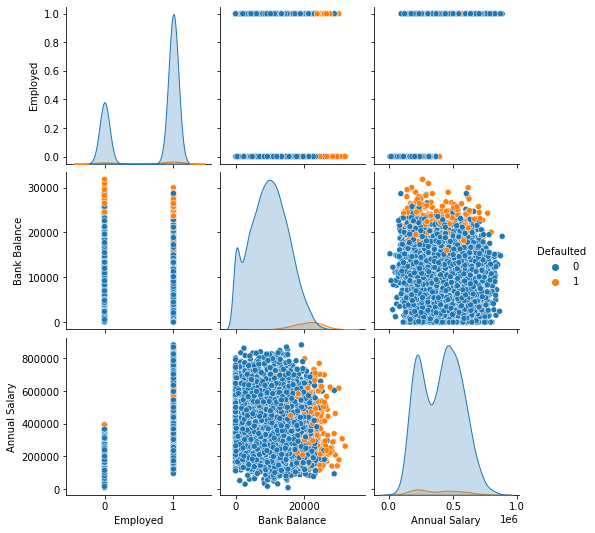

In [25]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='Defaulted')
plt.show()

In [5]:
employed = df.query("Employed == 1")
unemployed = df.query("Employed == 0")

In [12]:

fig=px.pie(df,values=employed['Defaulted?'].value_counts(),names=['Defaulters','Non-Defaulters'],title='Distribution of defualters who are Employed')
fig.update_traces(pull=[0.2,0,0.06,0.06,0.06,0.06])
fig.show()

In [14]:
plt.figure()
fig=px.pie(df,values=unemployed['Defaulted?'].value_counts(),names=['Defaulters','Non-Defaulters'],title='Distribution of defaulters who are Unemployed')
fig.update_traces(pull=[0.2,0,0.06,0.06,0.06,0.06])
fig.show()

<Figure size 432x288 with 0 Axes>

In [24]:
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df[df['Defaulted']==1]['Bank Balance'])
sns.kdeplot(df[df['Defaulted']==0]['Bank Balance'])
plt.title('Default x Bank Balance',fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Bank Balance',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.legend(labels=['Defaulted', 'Did Not Default'],fontsize=17)
plt.show()

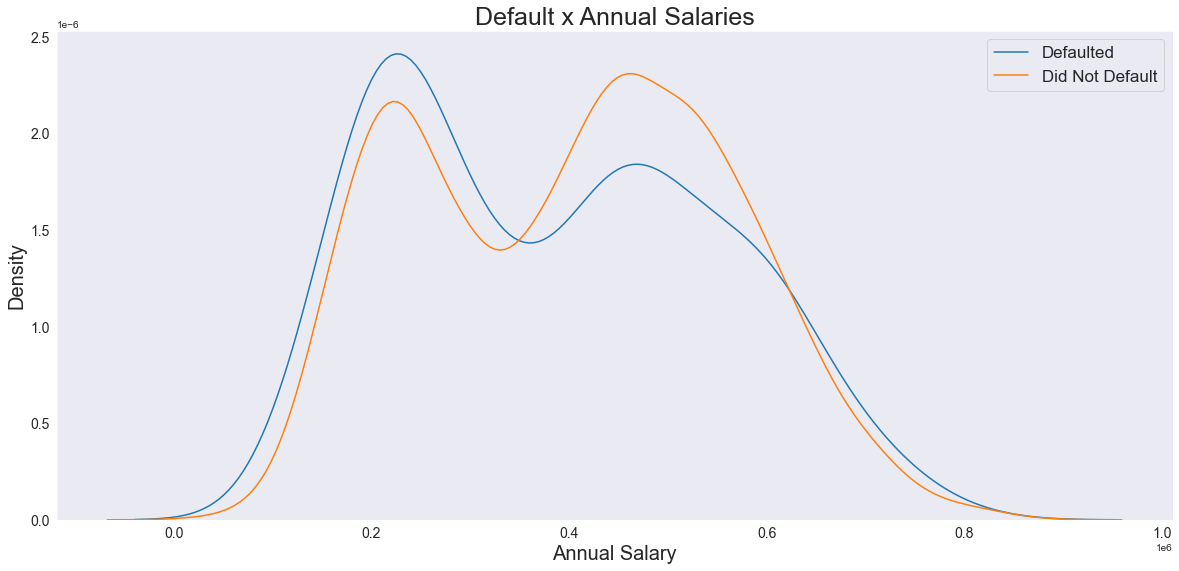

In [22]:
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df[df['Defaulted']==1]['Annual Salary'])
sns.kdeplot(df[df['Defaulted']==0]['Annual Salary'])
plt.title('Default x Annual Salaries',fontsize=25)
plt.legend(labels=['Defaulted', 'Did Not Default'],fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Annual Salary',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

In [13]:
df=df.drop('Index',axis=1)

<AxesSubplot:>

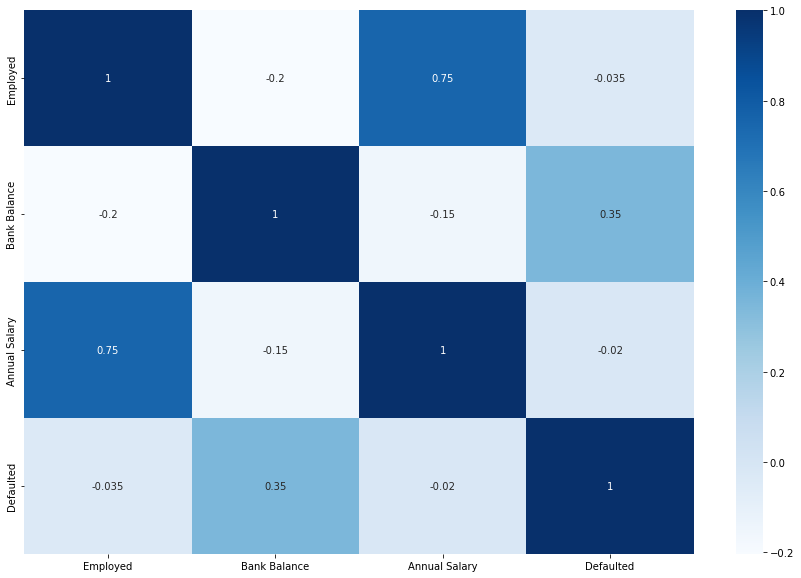

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Employed',hue='Defaulted',palette='nipy_spectral')
plt.xlabel('Employed',fontsize=17)
plt.show()

In [19]:
df1=df
df1.head()

Employed  Bank Balance  Annual Salary  Defaulted
0         1       8754.36      532339.56          0
1         0       9806.16      145273.56          0
2         1      12882.60      381205.68          0
3         1       6351.00      428453.88          0
4         1       9427.92      461562.00          0

In [21]:
bank_balance_bins = [0, 5000, 10000, 15000, 20000]  # Customize these bins 
annual_salary_bins = [0, 100000, 300000, 500000, 1000000] #Customizing the bins
df1['Bank Balance Bucket'] = pd.cut(df1['Bank Balance'], bins=bank_balance_bins, labels=['<5k', '5k-10k', '10k-15k', '15k-20k'])
df1['Annual Salary Bucket'] = pd.cut(df1['Annual Salary'], bins=annual_salary_bins, labels=['<100k', '100k-300k', '300k-500k', '500k-1M'])

# Print the resulting DataFrame
df1.head()

Employed  Bank Balance  Annual Salary  Defaulted Bank Balance Bucket  \
0         1       8754.36      532339.56          0              5k-10k   
1         0       9806.16      145273.56          0              5k-10k   
2         1      12882.60      381205.68          0             10k-15k   
3         1       6351.00      428453.88          0              5k-10k   
4         1       9427.92      461562.00          0              5k-10k   

  Annual Salary Bucket  
0              500k-1M  
1            100k-300k  
2            300k-500k  
3            300k-500k  
4            300k-500k

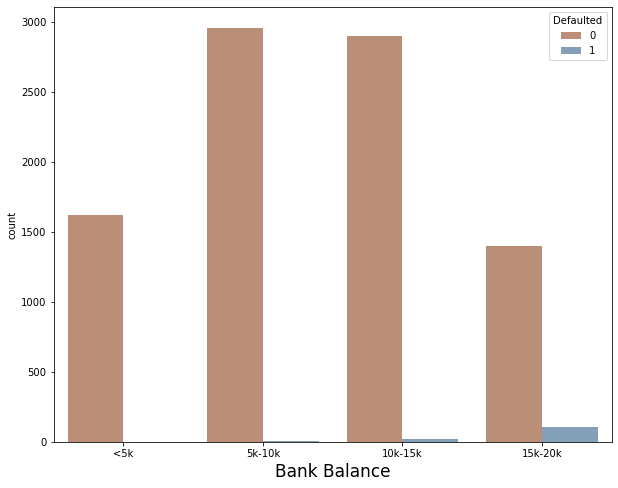

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(data=df1,x='Bank Balance Bucket',hue='Defaulted',palette='twilight_shifted_r')
plt.xlabel('Bank Balance',fontsize=17)
plt.show()

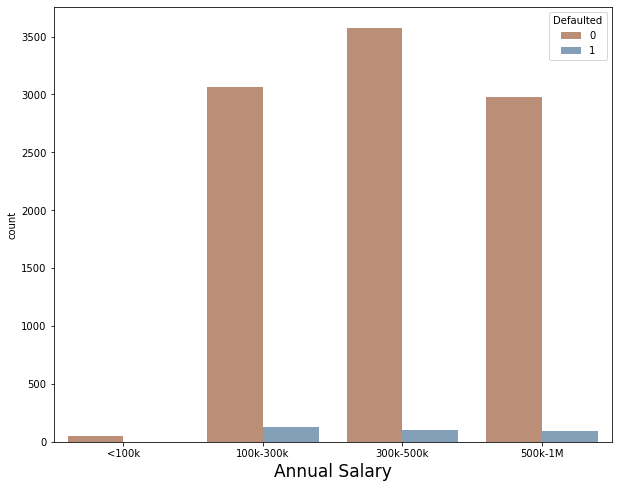

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(data=df1,x='Annual Salary Bucket',hue='Defaulted',palette='twilight_shifted_r')
plt.xlabel('Annual Salary',fontsize=17)
plt.show()

In [46]:
df=df.drop(['Bank Balance Bucket','Annual Salary Bucket'],axis=1)

### Scaling the data

In [56]:
from sklearn.preprocessing import StandardScaler

x=df.drop('Defaulted',axis=1)
y=df['Defaulted']
x=StandardScaler().fit_transform(x)
x=pd.DataFrame(x,columns=df.iloc[:,:3].columns)

Employed  Bank Balance  Annual Salary
0  0.645936     -0.218828       0.813188
1 -1.548141     -0.037617      -1.605496
2  0.645936      0.492412      -0.131212
3  0.645936     -0.632894       0.164031
4  0.645936     -0.102782       0.370915

### Splitting the data 

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=100,test_size=0.3)
print('Xtrain shape',xtrain.shape)
print('Xtest shape',xtest.shape)
print('Ytrain shape',ytrain.shape)
print('Ytest shape',ytest.shape)


Xtrain shape (7000, 3)
Xtest shape (3000, 3)
Ytrain shape (7000,)
Ytest shape (3000,)


### Model Building

In [82]:
#Train different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Gaussian NB': GaussianNB()
}
#Define a empty dictionary to store results 
results = {}

for model_name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    accuracy = accuracy_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)  # Rename this variable to something else (e.g., f1_score_value)
    recall = recall_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    roc_auc = roc_auc_score(ytest, ypred)

    results[model_name] = {
        'Accuracy': accuracy,
        'f1_score': f1,  # Corrected variable name
        'Recall': recall,
        'Precision': precision,
        'roc_auc_score': roc_auc
    }

#Print the results   
for model_name,metrics in results.items():
    print(f"Metrics for {model_name}:")
    for metric_name,value in metrics.items():
        print(f"{metric_name}:{value}")
    print()

Metrics for Logistic Regression:
Accuracy:0.9726666666666667
f1_score:0.34920634920634924
Recall:0.24175824175824176
Precision:0.6285714285714286
roc_auc_score:0.6186446760527201

Metrics for Decision Tree:
Accuracy:0.9536666666666667
f1_score:0.27225130890052357
Recall:0.2857142857142857
Precision:0.26
roc_auc_score:0.6301379953837842

Metrics for Random Forest:
Accuracy:0.97
f1_score:0.35714285714285715
Recall:0.27472527472527475
Precision:0.5102040816326531
roc_auc_score:0.6332375084523588

Metrics for Gradient Boosting:
Accuracy:0.9696666666666667
f1_score:0.37241379310344824
Recall:0.2967032967032967
Precision:0.5
roc_auc_score:0.6437108783275851

Metrics for Gaussian NB:
Accuracy:0.972
f1_score:0.35384615384615387
Recall:0.25274725274725274
Precision:0.5897435897435898
roc_auc_score:0.6236235404334407



From the above models, the highest accuracy we achieved in Logistic Regression and GauusianNB , but as the data is imbalanced so accuracy won't be the criteria for performance of model, rather we will choose f1 score , so the model which has highest f1 score is Gradient Boosting Model with f1_score of 0.37241379310344824

### ROC_AUC CURVE

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

gbc=GradientBoostingClassifier()
model=gbc.fit(xtrain,ytrain)
ypred=model.predict(xtest)

fpr,tpr,thresholds=roc_curve(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)

plt.figure(figsize=(17,8))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=17)
plt.ylabel('True Positive Rate',fontsize=17)
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize=25)
plt.legend(loc='lower right',fontsize=14)
plt.show()